In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [64]:
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Class 2 data
x_3 = np.random.multivariate_normal([3, -2], [[1, 0],[-.5, 1]], num_samples)
y_3 = np.ones(num_samples)+1

# Combining the data
X = np.vstack((x_1, x_2, x_3))
y = np.hstack((y_1, y_2, y_3))

/var/folders/9q/gllpszsd7tx204064mvtm3540000gn/T/ipykernel_32701/2849386185.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x_3 = np.random.multivariate_normal([3, -2], [[1, 0],[-.5, 1]], num_samples)


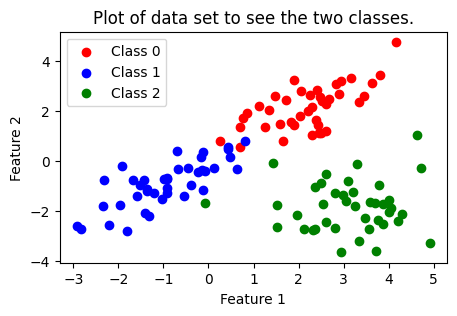

In [65]:
plt.figure(figsize=(5,3))
plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')
plt.scatter(x_3[:,0], x_3[:,1], color='green', label='Class 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of data set to see the two classes.')
plt.legend()
plt.show()

In [66]:
y_reshaped = y.reshape(-1, 1)

# Concatenate X and y column-wise
concatenated = np.concatenate((X, y_reshaped), axis=1)

In [67]:
df = pd.DataFrame(concatenated, columns=['Feature1', 'Feature2', 'Target'])

In [68]:
from sklearn.model_selection import train_test_split

# Features and target
y = df['Target']  # Series with the target variable
X = df[['Feature1', 'Feature2' ]]

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()

In [70]:
unique_classes = set(y.to_numpy())
unique_classes

{0.0, 1.0, 2.0}

In [71]:
y_train_reshaped = y_train.reshape(-1, 1)

# Concatenate X and y column-wise
concatenated_train = np.concatenate((X_train, y_train_reshaped), axis=1)

## Section 1: KNN with Euclidean Distance

In [72]:
i = 0
feature1 = X_test[i][0]
feature2 = X_test[i][1]

In [73]:
def calculateDistanceEuclidean(concatenated_train, feature1, feature2):
  # write this function and return distance list
  d = np.sqrt((feature1 - concatenated_train[:,0])**2 + (feature2 - concatenated_train[:,1])**2)

  distance = np.stack([d, concatenated_train[:,2]], axis=1)

  return distance

In [74]:
distance_list = calculateDistanceEuclidean(concatenated_train, feature1, feature2)

In [75]:
def sortDistanceList(distance_list):
  # write this function and return sorted distance list
  distance_sorted = distance_list[np.lexsort([distance_list[:,0]])]
  return distance_sorted 

In [76]:
distance_sorted = sortDistanceList(distance_list)

In [77]:
k=5
distance_sorted_k = distance_sorted[:k]
expected_array = [[0.24342591120588192, 1.0], [0.45871917392826284, 1.0], [0.47826677647289073, 1.0], [0.4904952649726137, 1.0], [0.5356271266554974, 1.0]]
assert np.allclose(distance_sorted_k, expected_array)

In [78]:
def findKNearestNeighbours( distance_sorted, k ):
  # write this function and return nearest_neighbour_group
  nearest_neighbour_group_list = distance_sorted[0:k]
  nearest_neighbour_group = np.round(np.average(nearest_neighbour_group_list[:,1]))
  return nearest_neighbour_group

In [79]:
findKNearestNeighbours(distance_sorted, 5)

1.0

In [80]:
nearest_neighbour_class = findKNearestNeighbours(distance_sorted, 5)
assert nearest_neighbour_class == 1

In [81]:
def runPredictionEuclidean(dataset, concatenated_train):
  # write this function and return a numpy array of predictions
  prediction = []
  for data in dataset:
    feature1 = data[0]
    feature2 = data[1]
    distance_list = calculateDistanceEuclidean(concatenated_train, feature1, feature2)
    distance_sorted = sortDistanceList(distance_list)
    prediction.append(findKNearestNeighbours(distance_sorted, 5))
  
  return np.array(prediction)

In [82]:
runPredictionEuclidean(X_test, concatenated_train)

array([1., 1., 0., 0., 0., 1., 1., 1., 1., 2., 0., 1., 0., 0., 2., 2., 2.,
       0., 2., 0., 1., 1., 0., 1.])

In [83]:
# make prediction on the test dataset.

predictions = runPredictionEuclidean(X_test, concatenated_train)
expected_array = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1])
assert np.allclose(predictions, expected_array)

In [84]:
def accuracy(predictions, target):
  # write this function and return the accuracy of the predictions
  acc = []
  for i in range(len(predictions)):
    if predictions[i] == target[i]:
      acc.append(1)
    else:
      acc.append(0)
  return sum(acc)/len(acc)

In [85]:
acc = accuracy(predictions, y_test)
assert acc == 0.875

## Section 2: KNN with Any Number of Features and Number of Categories

In [86]:
def calculateDistanceEuclidean_nFeatures(concatenated_train, feature_array ):
  # write this function and return sorted distance list for features with any dimensions
  _,col = concatenated_train.shape
  first_col = []
  
  for i in concatenated_train:
    temp = []
    for j in range(len(feature_array)):
      temp.append((feature_array[j] - i[j])**2)
      
    first_col.append( np.sqrt(np.sum(temp)) )
    
  first_col = np.array(first_col)
  distance = np.stack([first_col, concatenated_train[:,col - 1]], axis=1)
  return distance

In [87]:
distance_list = calculateDistanceEuclidean_nFeatures(concatenated_train, X_test[0] )

In [91]:
distance_list

array([[0.62731986, 1.        ],
       [4.26672965, 0.        ],
       [4.38917901, 0.        ],
       [4.99257222, 2.        ],
       [0.24342591, 1.        ],
       [3.9565014 , 2.        ],
       [3.29038406, 0.        ],
       [3.1690559 , 1.        ],
       [5.53219905, 0.        ],
       [3.69824221, 2.        ],
       [1.24890172, 1.        ],
       [1.49377119, 2.        ],
       [4.19031939, 0.        ],
       [3.20047964, 1.        ],
       [6.32754987, 2.        ],
       [4.83976794, 0.        ],
       [3.64534561, 0.        ],
       [3.14534867, 0.        ],
       [1.97944154, 1.        ],
       [4.67015575, 0.        ],
       [5.05483195, 2.        ],
       [4.94914149, 2.        ],
       [4.18361307, 0.        ],
       [3.23477547, 2.        ],
       [0.53562713, 1.        ],
       [3.64183944, 0.        ],
       [0.80029921, 1.        ],
       [3.1063027 , 0.        ],
       [3.64532286, 0.        ],
       [0.70476809, 1.        ],
       [3.

In [27]:
distance_sorted = sortDistanceList(distance_list)

In [28]:
k=5
distance_sorted_k = distance_sorted[:k]
expected_array = [[0.24342591120588192, 1.0], [0.45871917392826284, 1.0], [0.47826677647289073, 1.0], [0.4904952649726137, 1.0], [0.5356271266554974, 1.0]]
assert np.allclose(distance_sorted_k, expected_array)

In [29]:
unique_classes

{0.0, 1.0, 2.0}

In [30]:
def findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes ):
  # write this function and return the nearest neighbour group for features with any dimensions
  nearest_list = distance_sorted[0:k]
  k_list = list(nearest_list[:,-1])
  k_dict = {i:k_list.count(i) for i in unique_classes}
  reversed_dict = {value: key for key, value in k_dict.items()}
  
  Mvalue = max(k_dict.values())
  nearest_neighbour_group = reversed_dict[Mvalue]
  
  return nearest_neighbour_group

In [31]:
findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes )

1.0

In [32]:
nearest_neighbour_group = findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes )
assert nearest_neighbour_group == 1

In [33]:
def runPredictionEuclideanMultiClass(dataset, concatenated_train, unique_classes,k):
  # write this function and return the predictions for features with any dimensions
  prediction = []
  for data in dataset:
    distance_list = calculateDistanceEuclidean_nFeatures(concatenated_train, data )
    distance_sorted = sortDistanceList(distance_list)
    prediction.append(findKNearestNeighboursMultiClass( distance_sorted, k, unique_classes ))
    
  return np.array(prediction)

In [34]:
runPredictionEuclideanMultiClass(X_test, concatenated_train, unique_classes,5)

array([1., 1., 0., 0., 0., 1., 1., 1., 1., 2., 0., 1., 0., 0., 2., 2., 2.,
       0., 2., 0., 1., 1., 0., 1.])

In [35]:
predictions = runPredictionEuclideanMultiClass(X_test, concatenated_train, unique_classes,5)
expected_array = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1])
assert np.allclose(predictions, expected_array)

## Section 3: KNN with Real Dataset (Iris)

In [36]:
# Download Iris Dataset from: https://www.kaggle.com/datasets/uciml/iris

In [37]:
df_iris = pd.read_csv('archive (1)/Iris.csv')

In [38]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
# Features and target
y = df_iris['Species']  # Series with the target variable
X = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
df_y_test.values

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [41]:
def prepareInputData(df_X_train, df_X_test, df_y_train, df_y_test):
  # prepare X_text as numpy array
  X_train = df_X_train.to_numpy()
  X_test = df_X_test.to_numpy()
  Y_train = df_y_train.to_numpy()
  Y_test = df_y_test.to_numpy()
  # prepare concatenated_train as numpy array containing X_train and y_train
  Y_train = np.expand_dims(Y_train, axis=1)
  concatenated_train = np.concatenate((X_train,Y_train),axis=1)
  # reutrn the unqiue classes
  unique_classes = np.unique(Y_test)
  
  return X_test, concatenated_train, unique_classes

In [42]:
X_test, concatenated_train, unique_classes = prepareInputData(df_X_train, df_X_test, df_y_train, df_y_test)

In [43]:
concatenated_train

array([[4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [6.7, 3.1, 4.4, 1.4, 'Iris-versicolor'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
       [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
       [5.2, 3.5, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [5.8, 2.7, 5.1, 1.9, 'Iris-virginica'],
       [6.0, 3.4, 4.5, 1.6, 'Iris-versicolor'],
       [6.7, 3.1, 4.7, 1.5, 'Iris-versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [5.5, 2.4, 3.7, 1.0, 'Iris-versicolor'],
       [6.3, 2.8, 5.1, 1.5, 'Iris-virginica'],
       [6.4, 3.1, 5.5, 1.8, 'Iris-virginica'],
       [6.6, 3.0, 4.4, 1.4, 'Iris-versicolor'],
       [7.2, 3.6, 6.1, 2.5, 'Iris-virginica'],
       [5.7, 2.9, 4.2, 1.3, 'Iris-versicolor'],
       [7.6, 3.0, 6.6, 2.1, 'Iris

In [44]:
unique_classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
runPredictionEuclideanMultiClass(X_test,concatenated_train, unique_classes,5)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [46]:
predictions = runPredictionEuclideanMultiClass(X_test,concatenated_train, unique_classes,5)
assert predictions[0] == 'Iris-versicolor'
assert predictions[1] == 'Iris-setosa'
assert predictions[2] == 'Iris-virginica'

In [47]:
accuracy(predictions, df_y_test.values)

1.0

In [48]:
acc = accuracy(predictions, df_y_test.values)
assert acc == 1.0

In [49]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [50]:
df_y_test.values

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)